In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix=pd.read_csv ('netflix_titles.csv')

In [3]:
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


In [8]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
show_id         6234 non-null int64
type            6234 non-null object
title           6234 non-null object
director        4265 non-null object
cast            5664 non-null object
country         5758 non-null object
date_added      6223 non-null object
release_year    6234 non-null int64
rating          6224 non-null object
duration        6234 non-null object
listed_in       6234 non-null object
description     6234 non-null object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


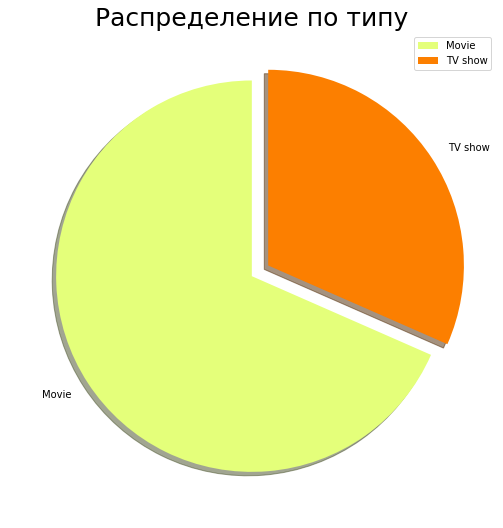

In [34]:
labels = ['Movie', 'TV show']
size = netflix['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Распределение по типу', fontsize = 25)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Возрастной рейтинг')

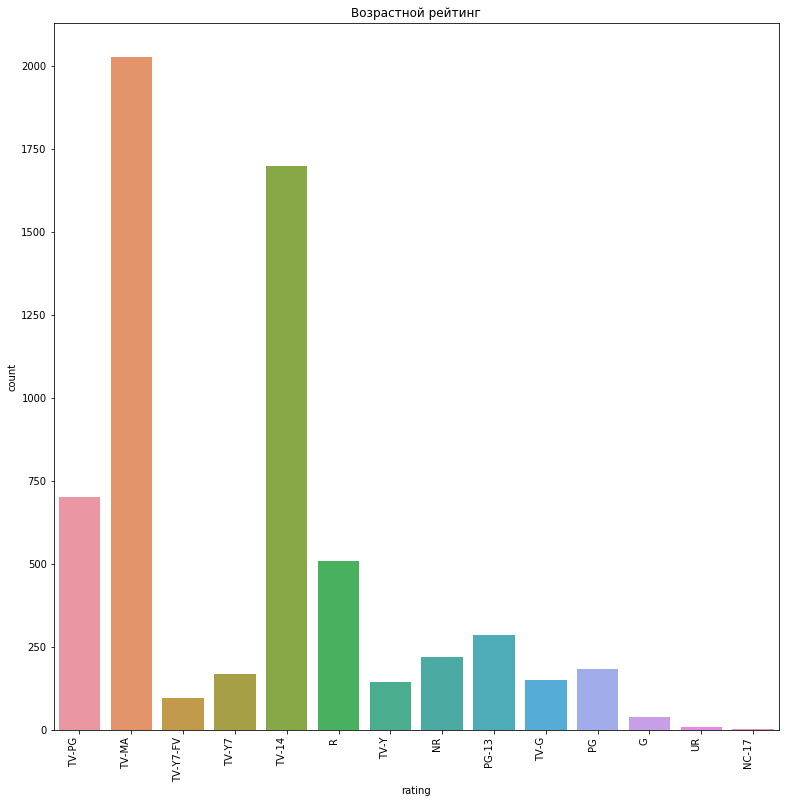

In [17]:
sns.countplot(netflix['rating'])
sns.countplot(netflix['rating']).set_xticklabels(sns.countplot(netflix['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Возрастной рейтинг')

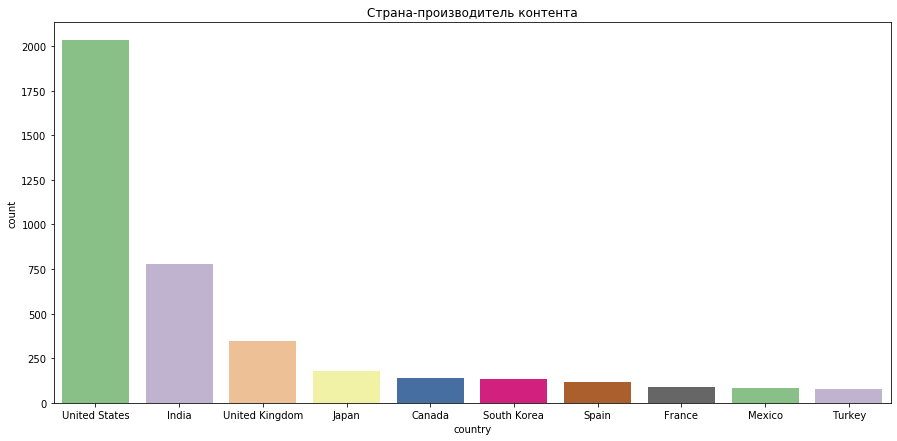

In [32]:
plt.figure(1, figsize=(15, 7))
plt.title("Страна-производитель контента")
sns.countplot(x = "country", order=netflix['country'].value_counts().index[0:10] ,data=netflix,palette='Accent')

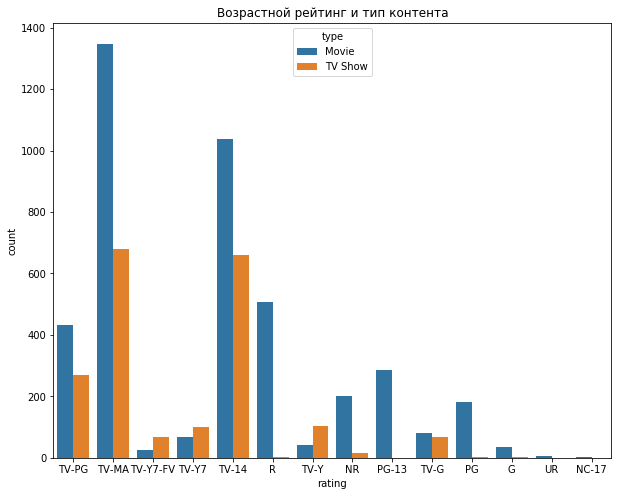

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=netflix)
plt.title('Возрастной рейтинг и тип контента')
plt.show()

Text(0.5, 1.0, 'Выпуск контента в год')

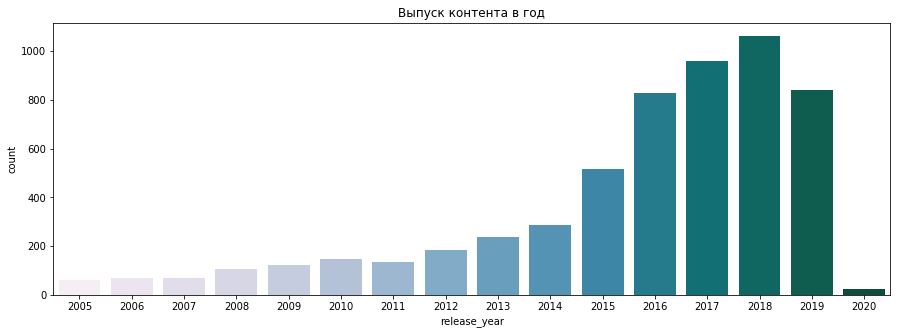

In [14]:
plt.figure(figsize = (15, 5))
sns.countplot(netflix['release_year'][netflix.release_year>2004], palette = 'PuBuGn')
plt.title('Выпуск контента в год')
#netflix.release_year.value_counts()[:15]

In [35]:
counts = netflix.groupby(['release_year', 'type'])['show_id'].count().to_frame().reset_index()
counts = pd.pivot_table(counts, values='show_id', index=['release_year'], columns=['type']).fillna(0).reset_index()

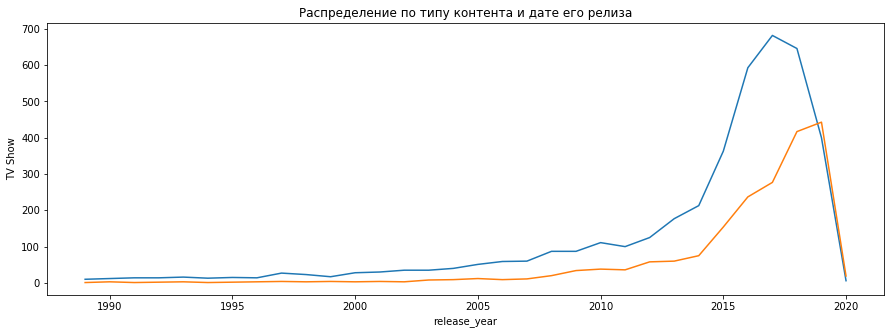

In [36]:
plt.figure(figsize = (15,5))
ax = sns.lineplot(x='release_year', y='Movie', data=counts[40:])
ax2 = sns.lineplot(x='release_year', y='TV Show', data=counts[40:]).set_title('Распределение по типу контента и дате его релиза')

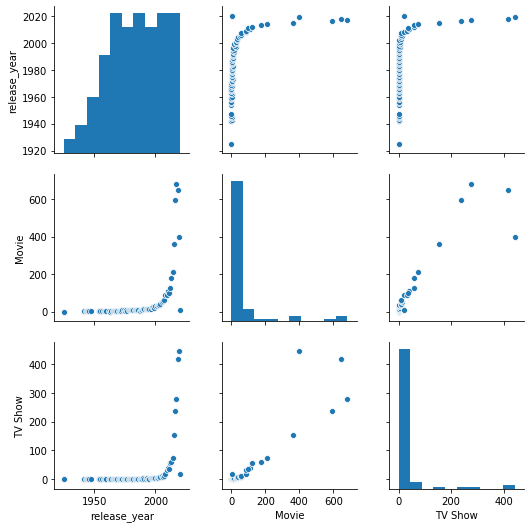

In [27]:
sns_plot = sns.pairplot(
    counts[['release_year', 'Movie', 'TV Show']])
sns_plot

Text(0, 0.5, 'Number of Titles')

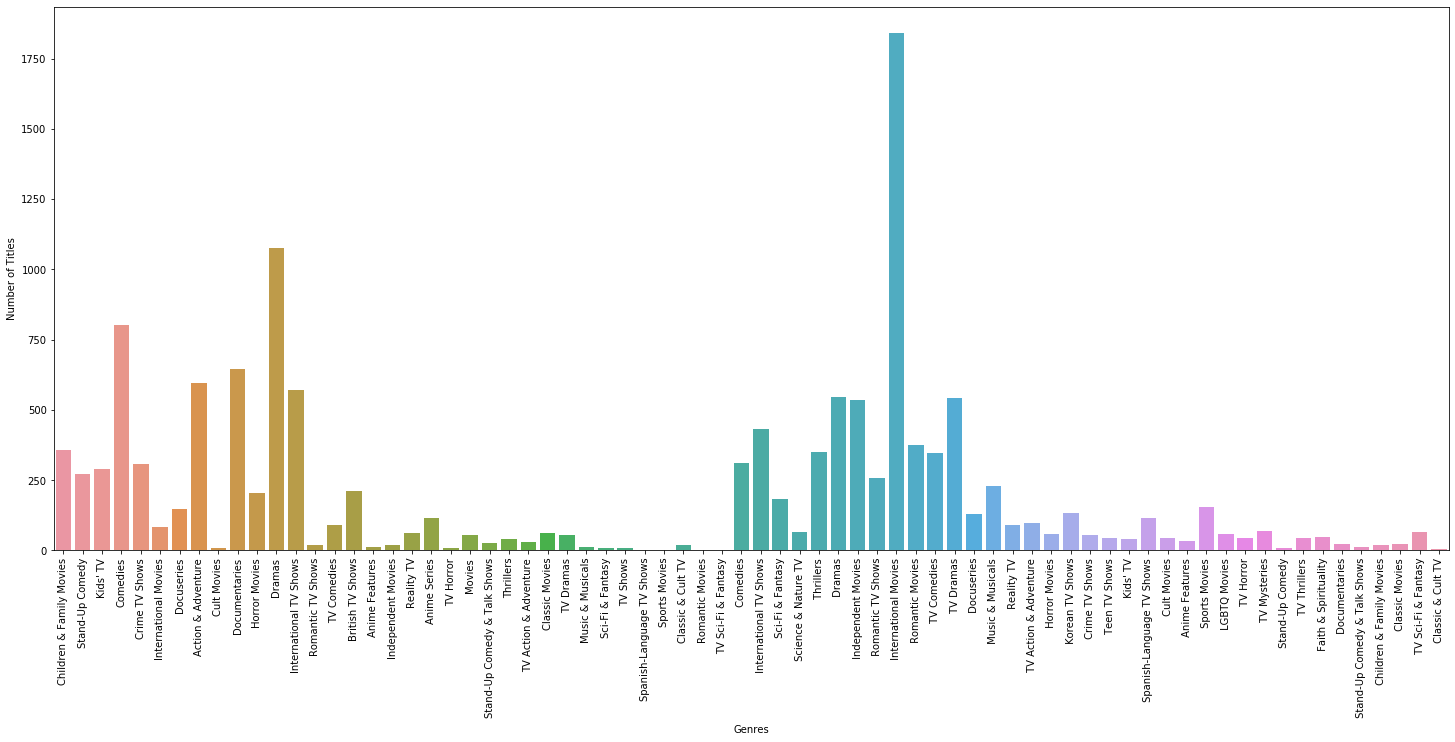

In [28]:
genres = netflix['listed_in'].str.split(',', 4, expand=True)
genres['title'] = netflix['title']
genres = genres[['title', 0, 1, 2]]
genres = pd.melt(genres, id_vars=['title'], value_vars=[0, 1, 2])
genres = genres.dropna()
genres = genres.drop('variable', axis = 1)
plt.figure(figsize=(25,10))
plot = sns.countplot(x = 'value', data = genres)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.xlabel('Genres')
plt.ylabel('Number of Titles')